# Unit 12 NLP Assigment
# Section One: 
## Using the newsapi for BTC and ETH to create Sentiment Analysis (SA) for each coin

# Initial imports

In [39]:

import os
import pandas as pd
from pathlib import Path
from dotenv import load_dotenv
load_dotenv()
import nltk as nltk
from newsapi import NewsApiClient
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [41]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [42]:
# Fetch the top Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en")
bitcoin_articles

#

{'status': 'ok',
 'totalResults': 7290,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Paul Ford',
   'title': 'A Field Guide for Nature-Resistant Nerds',
   'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
   'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
   'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
   'publishedAt': '2021-08-06T11:00:00Z',
   'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'},
  {'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Khari Johnson',
   'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
   'description': 'Autonomous vehicles use the equivalent of 200 laptops to 

In [43]:
# Total bitcoin article results
print(f"Bitcoin article total: {bitcoin_articles['totalResults']}")

#Show sample bitcoin article - 3rd result
bitcoin_articles['articles'][2]

Bitcoin article total: 7290


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Richard Dal Porto',
 'title': 'Daily Crunch: Bitcoin ‘is a big part of our future,’ says Twitter CEO Jack Dorsey',
 'description': 'Hello friends and welcome to Daily Crunch, bringing you the most important startup, tech and venture capital news in a single package.',
 'url': 'http://techcrunch.com/2021/07/23/daily-crunch-bitcoin-is-a-big-part-of-our-future-says-twitter-ceo-jack-dorsey/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/10/GettyImages-1216921783.jpg?w=576',
 'publishedAt': '2021-07-23T22:10:45Z',
 'content': 'To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]'}

In [44]:
# Fetch the top Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", language="en")
ethereum_articles

{'status': 'ok',
 'totalResults': 2462,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Connie Loizos',
   'title': 'Crypto investors like Terraform Labs so much, they’re committing $150 million to its ‘ecosystem’',
   'description': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote about in May. Often, these technologies are seen as so prom…',
   'url': 'http://techcrunch.com/2021/07/16/crypto-investors-like-terraform-labs-so-much-theyre-committing-150-million-to-its-ecosystem/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1174590894.jpg?w=667',
   'publishedAt': '2021-07-16T16:00:55Z',
   'content': 'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Kille

In [45]:
# Total ethereum article results
print(f"Ethereum article total: {ethereum_articles['totalResults']}")

#Show sample ethereum article - 5th result
ethereum_articles['articles'][4]

Ethereum article total: 2462


{'source': {'id': 'reuters', 'name': 'Reuters'},
 'author': 'Reuters',
 'title': 'Ethereum major upgrade activated; ether stays lower - Reuters',
 'description': 'A major software upgrade on Ethereum, the second-largest blockchain network, was activated on Thursday, a move seen as stabilizing transaction fees on the network and subsequently reducing the supply of the ether token.',
 'url': 'https://www.reuters.com/technology/ethereum-major-upgrade-activated-ether-stays-lower-2021-08-05/',
 'urlToImage': 'https://www.reuters.com/resizer/0BxXzmVhK1PkIw75bBwMHxbHzvY=/1200x628/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/NENHSOKGOJMQVFJQB2ZPYW4D4E.jpg',
 'publishedAt': '2021-08-05T12:48:00Z',
 'content': 'Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/IllustrationNEW YORK, Aug 5 (Reuters) - A maj… [+439 chars]'}

In [46]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiment_df = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        bitcoin_sentiment_df.append({
            "text": text,
            "date": date,
            "compound": compound, 
            "positive": pos, 
            "negative": neg,
            "neutral": neu

        })
    except AttributeError:
        pass

# Create Dataframe
bitcoin_df = pd.DataFrame(bitcoin_sentiment_df)

# Arrange columns so that the date is first
bitcoin_df = bitcoin_df.set_index("date")
bitcoin_df.head()


,text,compound,positive,negative,neutral
date,,,,,
2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939
2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2021-07-21,"As longtime TechCrunch readers know well, Mich...",0.4939,0.127,0.000,0.873


In [47]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiment_df = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]

        ethereum_sentiment_df.append({
            "text": text,
            "date": date,
            "compound": compound, 
            "positive": pos, 
            "negative": neg,
            "neutral": neu

        })
    except AttributeError:
        pass

# Create Dataframe
ethereum_df = pd.DataFrame(ethereum_sentiment_df)

# Arrange columns so that the date is first
ethereum_df = ethereum_df.set_index("date")
ethereum_df.head()


,text,compound,positive,negative,neutral
date,,,,,
2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810
2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000


In [48]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.059435,0.060900,0.046450,0.892650
std,0.471962,0.060969,0.083549,0.093352
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.307000,0.000000,0.000000,0.853250
50%,0.000000,0.056000,0.000000,0.910500
75%,0.467575,0.100000,0.076250,0.954250
max,0.726400,0.178000,0.287000,1.000000


In [49]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.174515,0.056050,0.01345,0.93050
std,0.312339,0.073898,0.02766,0.08117
min,-0.340000,0.000000,0.00000,0.78200
25%,0.000000,0.000000,0.00000,0.84275
50%,0.000000,0.000000,0.00000,0.96950
75%,0.402575,0.129500,0.00000,1.00000
max,0.726400,0.190000,0.07200,1.00000


# Section Two: Natural Language Processing

## Tokenize the text for BTC using NLTK and Python

In [50]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [51]:
# Code to download corpora
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [52]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
print(stopwords.words('english'))


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [53]:
# We can define our own list of stopwords to add to the default nltk words
sw_addon = {'http', 'https', 'www','.com'}



In [54]:
#Show sample bitcoin article - 3rd result
bitcoin_articles['articles'][2]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Richard Dal Porto',
 'title': 'Daily Crunch: Bitcoin ‘is a big part of our future,’ says Twitter CEO Jack Dorsey',
 'description': 'Hello friends and welcome to Daily Crunch, bringing you the most important startup, tech and venture capital news in a single package.',
 'url': 'http://techcrunch.com/2021/07/23/daily-crunch-bitcoin-is-a-big-part-of-our-future-says-twitter-ceo-jack-dorsey/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/10/GettyImages-1216921783.jpg?w=576',
 'publishedAt': '2021-07-23T22:10:45Z',
 'content': 'To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]'}

In [55]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

# Convert the words to lowercase
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")

# Remove the punctuation from text
    re_clean = regex.sub('', text)

# Create a tokenized list of the words
    words = word_tokenize(re_clean)

# Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens
    

In [56]:
print(set(tokenizer(text))) 

{'representation', 'picture', 'taken', 'char', 'cryptocurrency', 'virtual', 'june', 'among', 'suil', 'reuters', 'cryptocurrencies', 'illustration', 'ethereum', 'reutersedgar', 'staffa', 'seen'}


In [57]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()


,text,compound,positive,negative,neutral,tokens
date,,,,,,
2021-08-06,When my wife started a little garden in our ur...,-0.3400,0.000,0.061,0.939,"[wife, started, little, garden, urban, backyar..."
2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, important..."
2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2021-07-21,"As longtime TechCrunch readers know well, Mich...",0.4939,0.127,0.000,0.873,"[longtime, techcrunch, reader, know, well, mic..."


In [58]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,text,compound,positive,negative,neutral,tokens
date,,,,,,
2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[many, blockchain, platform, competing, invest..."
2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[retail, investor, grew, comfortable, buying, ..."
2021-08-05,Cent was founded in 2017 as an ad-free creator...,0.6956,0.190,0.000,0.810,"[cent, wa, founded, adfree, creator, network, ..."
2021-08-05,Representation of the Ethereum virtual currenc...,0.0000,0.000,0.000,1.000,"[representation, ethereum, virtual, currency, ..."


## Using ngrams and word frequency for each coin. 
Use NLTK to produce the n-grams for N = 2. 
List the top 10 words for each coin.

In [59]:
from collections import Counter
from nltk import ngrams

In [76]:
# To generate the Bitcoin n-grams, we need to tokenize the Bitcoin articles
bitcoin_tokenize = tokenizer(bitcoin_df.text.str.cat())
bitcoin_tokenize

['wife',
 'started',
 'little',
 'garden',
 'urban',
 'backyard',
 'could',
 'think',
 'worm',
 'also',
 'bug',
 'dirt',
 'course',
 'filled',
 'worm',
 'bug',
 'composted',
 'corn',
 'cob',
 'charslike',
 'dogecoin',
 'devotee',
 'mayor',
 'reno',
 'leader',
 'el',
 'salvador',
 'aldo',
 'baoicchi',
 'convinced',
 'cryptocurrency',
 'future',
 'ceo',
 'founder',
 'canadian',
 'scooter',
 'maker',
 'daymak',
 'belief',
 'charsto',
 'get',
 'roundup',
 'techcrunchs',
 'biggest',
 'important',
 'story',
 'delivered',
 'inbox',
 'every',
 'day',
 'pm',
 'pdt',
 'subscribe',
 'herehello',
 'welcome',
 'daily',
 'crunch',
 'july',
 'charswhile',
 'retail',
 'investor',
 'grew',
 'comfortable',
 'buying',
 'cryptocurrencies',
 'like',
 'bitcoin',
 'ethereum',
 'decentralized',
 'application',
 'world',
 'still',
 'ha',
 'lot',
 'work',
 'come',
 'onboarding',
 'charsas',
 'longtime',
 'techcrunch',
 'reader',
 'know',
 'well',
 'michael',
 'arrington',
 'cofounded',
 'techcrunch',
 'crunchba

In [77]:
# Generate the Bitcoin N-grams where N=2
N=2
btc_ngrams = Counter(ngrams(bitcoin_tokenize, N))
print(dict(btc_ngrams))

{('wife', 'started'): 1, ('started', 'little'): 1, ('little', 'garden'): 1, ('garden', 'urban'): 1, ('urban', 'backyard'): 1, ('backyard', 'could'): 1, ('could', 'think'): 1, ('think', 'worm'): 1, ('worm', 'also'): 1, ('also', 'bug'): 1, ('bug', 'dirt'): 1, ('dirt', 'course'): 1, ('course', 'filled'): 1, ('filled', 'worm'): 1, ('worm', 'bug'): 1, ('bug', 'composted'): 1, ('composted', 'corn'): 1, ('corn', 'cob'): 1, ('cob', 'charslike'): 1, ('charslike', 'dogecoin'): 1, ('dogecoin', 'devotee'): 1, ('devotee', 'mayor'): 1, ('mayor', 'reno'): 1, ('reno', 'leader'): 1, ('leader', 'el'): 1, ('el', 'salvador'): 1, ('salvador', 'aldo'): 1, ('aldo', 'baoicchi'): 1, ('baoicchi', 'convinced'): 1, ('convinced', 'cryptocurrency'): 1, ('cryptocurrency', 'future'): 1, ('future', 'ceo'): 1, ('ceo', 'founder'): 1, ('founder', 'canadian'): 1, ('canadian', 'scooter'): 1, ('scooter', 'maker'): 1, ('maker', 'daymak'): 1, ('daymak', 'belief'): 1, ('belief', 'charsto'): 1, ('charsto', 'get'): 1, ('get', 'r

In [78]:
# To generate the Ethereum n-grams, we need to tokenize the Ethereum articles
ethereum_tokenize = tokenizer(ethereum_df.text.str.cat())
ethereum_tokenize

['many',
 'blockchain',
 'platform',
 'competing',
 'investor',
 'developer',
 'attention',
 'right',
 'big',
 'daddy',
 'ethereum',
 'socalled',
 'ethereum',
 'killers',
 'like',
 'solana',
 'wrote',
 'charsblockchain',
 'infrastructure',
 'startup',
 'heating',
 'industry',
 'fervor',
 'brings',
 'developer',
 'user',
 'space',
 'still',
 'feel',
 'extremely',
 'young',
 'despite',
 'heavy',
 'institutional',
 'embrace',
 'crypto',
 'charswhile',
 'retail',
 'investor',
 'grew',
 'comfortable',
 'buying',
 'cryptocurrencies',
 'like',
 'bitcoin',
 'ethereum',
 'decentralized',
 'application',
 'world',
 'still',
 'ha',
 'lot',
 'work',
 'come',
 'onboarding',
 'charscent',
 'wa',
 'founded',
 'adfree',
 'creator',
 'network',
 'allows',
 'user',
 'offer',
 'crypto',
 'reward',
 'good',
 'post',
 'comment',
 'like',
 'gifting',
 'award',
 'reddit',
 'ethereum',
 'charsrepresentation',
 'ethereum',
 'virtual',
 'currency',
 'standing',
 'pc',
 'motherboard',
 'seen',
 'illustration',
 

In [79]:
# Generate the Ethereum N-grams where N=2
N=2
eth_ngrams = Counter(ngrams(ethereum_tokenize, N))
print(dict(eth_ngrams))

{('many', 'blockchain'): 1, ('blockchain', 'platform'): 1, ('platform', 'competing'): 1, ('competing', 'investor'): 1, ('investor', 'developer'): 1, ('developer', 'attention'): 1, ('attention', 'right'): 1, ('right', 'big'): 1, ('big', 'daddy'): 1, ('daddy', 'ethereum'): 1, ('ethereum', 'socalled'): 1, ('socalled', 'ethereum'): 1, ('ethereum', 'killers'): 1, ('killers', 'like'): 1, ('like', 'solana'): 1, ('solana', 'wrote'): 1, ('wrote', 'charsblockchain'): 1, ('charsblockchain', 'infrastructure'): 1, ('infrastructure', 'startup'): 1, ('startup', 'heating'): 1, ('heating', 'industry'): 1, ('industry', 'fervor'): 1, ('fervor', 'brings'): 1, ('brings', 'developer'): 1, ('developer', 'user'): 1, ('user', 'space'): 1, ('space', 'still'): 1, ('still', 'feel'): 1, ('feel', 'extremely'): 1, ('extremely', 'young'): 1, ('young', 'despite'): 1, ('despite', 'heavy'): 1, ('heavy', 'institutional'): 1, ('institutional', 'embrace'): 1, ('embrace', 'crypto'): 1, ('crypto', 'charswhile'): 1, ('charswh

In [ ]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [83]:
# Use token_count and return the top N tokens to get the top 10 words for Bitcoin. 
def token_count(tokens, N=10):
    return Counter(tokens).most_common(N)

bitcoin_topwords = token_count(bitcoin_tokenize, 10)
bitcoin_topwords

[('bitcoin', 10),
 ('reuters', 7),
 ('july', 5),
 ('illustration', 5),
 ('taken', 5),
 ('reutersdado', 5),
 ('attack', 5),
 ('seen', 4),
 ('get', 3),
 ('cryptocurrencies', 3)]

In [84]:
# Use token_count to get the top 10 words for Ethereum
def token_count(tokens, N=10):
    return Counter(tokens).most_common(N)

ethereum_topwords = token_count(ethereum_tokenize, 10)
ethereum_topwords

[('ethereum', 15),
 ('illustration', 6),
 ('reuters', 6),
 ('reutersdado', 5),
 ('taken', 5),
 ('platform', 4),
 ('like', 4),
 ('cryptocurrencies', 4),
 ('bitcoin', 4),
 ('ha', 4)]

## Using Word Clouds to summarize the news for each coin

In [87]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

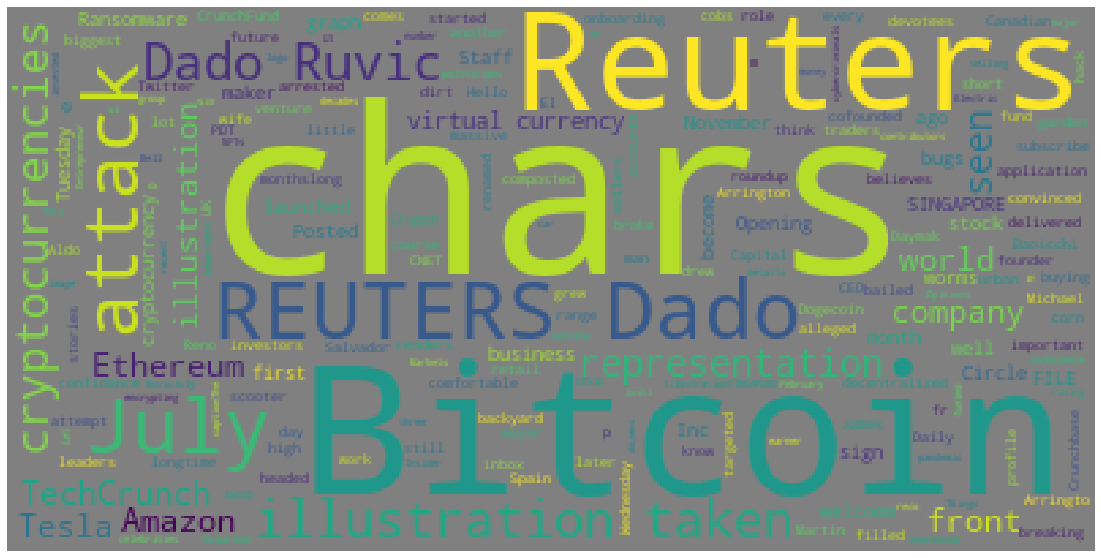

In [100]:
# Generate the Bitcoin word cloud
btc_cloud = WordCloud(background_color="gray").generate(bitcoin_df.text.str.cat())
btc_cloud
plt.axis("off")
plt.imshow(btc_cloud)


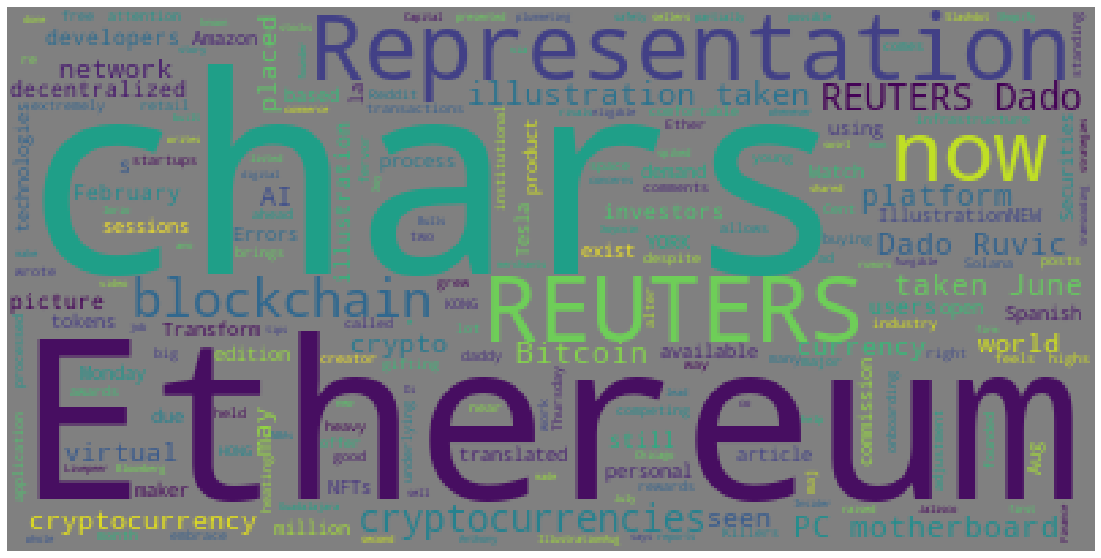

In [101]:
# Generate the Ethereum word cloud
eth_cloud = WordCloud(background_color="gray").generate(ethereum_df.text.str.cat())
eth_cloud
plt.axis("off")
plt.imshow(eth_cloud)

# Section Three: Named Entity Recognition
## building a named entity recognition model for BTC & ETH
## visualizing the tags using SpaCy

In [105]:
import spacy
from spacy import displacy

In [102]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2021-08-09 14:32:13.005106: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-08-09 14:32:13.006059: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [106]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## BTC NER

In [107]:
# Concatenate all of the Bitcoin text together
concat_all_btc = bitcoin_df.text.str.cat()
concat_all_btc

"When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]Like Dogecoin devotees, the mayor of Reno, and the leaders of El Salvador, Aldo Baoicchi is convinced cryptocurrency is the future. The CEO and founder of Canadian scooter maker Daymak believes this … [+4116 chars]To get a roundup of TechCrunchs biggest and most important stories delivered to your inbox every day at 3 p.m. PDT, subscribe here.\r\nHello and welcome to Daily Crunch for July 23, 2021. Its been an i… [+5456 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]As longtime TechCrunch readers know well, Michael Arrington cofounded TechCrunch and Crunchbase, as well as the venture fund CrunchFund, whic

In [109]:
# Run the NER processor on all of the text
btc_doc = nlp(concat_all_btc)



In [110]:
# Add a title to the document
btc_doc.user_data["Title"] = "Bitcoin NER Processor"

In [115]:
# Render the visualization of the Named Entity Recognition, using (ent)
displacy.render(btc_doc, style = "ent")

In [116]:
# List all Entities
for all_entities in btc_doc.ents:
    print(all_entities.text, all_entities.label_)

Dogecoin GPE
Reno PERSON
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
3 p.m. PDT TIME
Daily Crunch WORK_OF_ART
July 23, 2021 DATE
Bitcoin and Ethereum ORG
2021 DATE
TechCrunch ORG
Michael Arrington PERSON
Crunchbase ORG
CrunchFund ORG
Tuesday DATE
2017 DATE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
Martin/CNET
 ORG
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
Dado Ruvic/IllustrationSINGAPORE PERSON
July 21 DATE
Reuters ORG
Reuters ORG
November 19, 2020 DATE
10 CARDINAL
Things Before the Opening Bell WORK_OF_ART
Markets Insider PERSON
first ORDINAL
Entrepreneur ORG
first ORDINAL
more than three decades ago DATE
six months ago DATE
dozens CARDINAL
February 9, 2021 DATE
Dado RuvicJuly 21 PERSON
Reuters ORG
Tesla Inc PERSON
2020 DATE
Russian NORP
hundreds CARDINAL
Concord Acquisition Corp ORG
one CARDINAL
July 20 DATE
Reuters ORG
Tuesday DATE
almost a month DATE
30,000 MONEY
Reuters ORG
Amazon ORG
July 13, 2021 DA

## ETH NER

In [117]:
# Concatenate all of the Ethereum text together
concat_all_eth = ethereum_df.text.str.cat()
concat_all_eth

'There are many blockchain platforms competing for investors’ and developers’ attention right now, from the big daddy of them all, Ethereum, to so-called “Ethereum Killers” like Solana, which we wrote… [+2563 chars]Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto s… [+2468 chars]While retail investors grew more comfortable buying cryptocurrencies like Bitcoin and Ethereum in 2021, the decentralized application world still has a lot of work to do when it comes to onboarding a… [+2288 chars]Cent was founded in 2017 as an ad-free creator network that allows users to offer each other crypto rewards for good posts and comments — it’s like gifting awards on Reddit, but with Ethereum. But in… [+6228 chars]Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/

In [118]:
# Run the NER processor on all of the text
eth_doc = nlp(concat_all_eth)

In [119]:
# Render the visualization
displacy.render(eth_doc, style = "ent")

In [120]:
# List all Entities
for all_entities in eth_doc.ents:
    print(all_entities.text, all_entities.label_)

Ethereum ORG
Ethereum Killers WORK_OF_ART
Solana PERSON
Bitcoin and Ethereum ORG
2021 DATE
2017 DATE
Reddit NORP
Ethereum ORG
Ethereum ORG
February 3, 2018 DATE
Dado Ruvic PERSON
IllustrationNEW YORK GPE
5 CARDINAL
Reuters ORG
Reuters ORG
two-month DATE
Thursday DATE
Bitcoin and Ethereum ORG
June 29, 2021 DATE
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Monday DATE
Amazon ORG
Amazon ORG
Di Iorio PERSON
Ethereum ORG
Bloomberg PERSON
Slashdot ORG
Ethereum ORG
June 29, 2021 DATE
Dado Ruvic PERSON
IllustrationNEW YORK GPE
July 30 DATE
Reuters ORG
second ORDINAL
Livepeer PRODUCT
$20 million MONEY
Ethereum ORG
Spanish NORP
AI ORG
Xoy Capital ORG
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON
first ORDINAL
Monday DATE
Chicago Bulls ORG
American Express ORG
Spanish NORP
AI ORG
The Securities and Exchange Commission ORG
London GPE
Ethereum ORG
12 965 CARDINAL
between August 3-5, 2021 DATE
Clie PERSON
Polygon PERSON
$100 million MONEY
Bitcoin, Ethereum ORG
Litecoin PERSON
June 29, 2021 DATE
Febr